In [12]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Carga de datos CIFAR10
cifar_10 = cifar10.load_data()

#División de prueba y entrenamiento
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [13]:
#Normalización de los valores de los píxeles del train y prueba
x_train = x_train / 255
x_test = x_test / 255

In [19]:
import keras

#Construcción del modelo de clasificación
model = keras.models.Sequential([
    #Adición de convoluciones y max pooling
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D((2, 2)),
    #Agregar las mismas capas anteriores
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               921728    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 923914 (3.52 MB)
Trainable params: 923914 (3.52 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [20]:
#Compilación del modelo
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [21]:
#Entrenamiento
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.4668 - accuracy: 0.4771
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1760 - accuracy: 0.5879
Epoch 3/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0609 - accuracy: 0.6277
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9693 - accuracy: 0.6609
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8919 - accuracy: 0.6859
Epoch 6/10
1563/1563 [==============================] - 45s 28ms/step - loss: 0.8215 - accuracy: 0.7110
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7691 - accuracy: 0.7294
Epoch 8/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.7108 - accuracy: 0.7516
Epoch 9/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6570 - accuracy: 0.7682
Epoch 10/10
1563/1563 [==============================] - 45s 29m

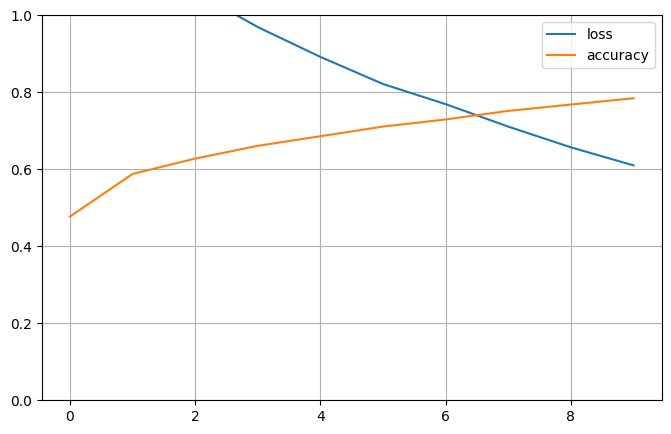

In [22]:
#Gráfico del historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
#Evalución del modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(x_train, y_train)
print("Loss training:", loss)
print("Accuracy training:", accuracy)

#Evaluación con datos no vistos
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss test:", loss)
print("Accuracy test:", accuracy)

1563/1563 [==============================] - 17s 11ms/step - loss: 0.5093 - accuracy: 0.8264
Loss training: 0.5093011856079102
Accuracy training: 0.8263800144195557
313/313 [==============================] - 4s 12ms/step - loss: 1.1400 - accuracy: 0.6407
Loss test: 1.139971137046814
Accuracy test: 0.6406999826431274


In [24]:
#Predicción
index = 1
print(f'Label: {y_test[index]}')
classification = model.predict(x_test[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')

Label: [8]
1/1 [==============================] - 1s 535ms/step
Classification:
 [[7.1557704e-05]
 [2.3198268e-01]
 [9.8323544e-11]
 [1.1438355e-08]
 [1.2145125e-08]
 [2.0430081e-08]
 [1.1385379e-11]
 [4.5814822e-13]
 [7.6786619e-01]
 [7.9549478e-05]]
